### Forcasting Temerature Change
#### Project 2

In [59]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [60]:
# The dataset for city used as it includes both the country and city
df= pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [61]:
# Checking the first rows of the data
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [62]:
# Selecting subset of the data for US
df_US = df[df["Country"] == "United States"].reset_index()

In [63]:
# Checking US data set
df_US.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
1,47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
2,47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
3,47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
4,47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [64]:
# Checking Size
df_US.shape


(687289, 8)

In [65]:
# Selecting few columns in the dataset

df_US2 = df_US[['dt', 'AverageTemperature']]


In [66]:
df_US2.shape

(687289, 2)

In [67]:
df_US2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687289 entries, 0 to 687288
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   dt                  687289 non-null  object 
 1   AverageTemperature  661524 non-null  float64
dtypes: float64(1), object(1)
memory usage: 10.5+ MB


In [68]:
# Changing the data type to datetime 

# Adding import warnings
import warnings
warnings.filterwarnings('ignore')

df_US2['dt'] = pd.to_datetime(df_US2['dt'])


In [69]:
# Checking the new dataset 
df_US2.head()

,dt,AverageTemperature
0,1820-01-01,2.101
1,1820-02-01,6.926
2,1820-03-01,10.767
3,1820-04-01,17.989
4,1820-05-01,21.809


In [70]:
# Checking data type
df_US2.dtypes

dt                    datetime64[ns]
AverageTemperature           float64
dtype: object

In [71]:
# Aggregating data by year mean temperature
df_avg = df_US2.groupby('dt').agg({'AverageTemperature': ['mean']})

In [72]:
# Checking the New Dataset
df_avg.head()

,AverageTemperature
,mean
dt,
1743-11-01,5.818071
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN


In [75]:
# Checking the size of the new dataset
df_avg.shape

(3239, 1)

In [76]:
## Missing Values
df_nulls = pd.DataFrame(df_avg.isnull().sum().sort_values(ascending=False), columns=['Number of Missing Values'])
df_nulls['% Missing'] = df.isnull().sum().sort_values(ascending=False)/len(df)
df_nulls

,,Number of Missing Values,% Missing
AverageTemperature,mean,98,NaN


In [77]:
# First rows with missing vlaues  
rows_with_nulls = df_avg[df_avg.isnull().any(axis=1)]
rows_with_nulls.head()

,AverageTemperature
,mean
dt,
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN
1744-08-01,NaN


In [78]:
# Bottom rows with missing vlaues  
rows_with_nulls.tail()

,AverageTemperature
,mean
dt,
1778-08-01,NaN
1780-09-01,NaN
1780-10-01,NaN
1780-11-01,NaN
1780-12-01,NaN


In [82]:
# Selecting Year starting from 1800
df_avg_1800 = df_avg[df_avg.index.year >= 1800]

In [84]:
# Getting null values
null_counts = df_avg_1800.isnull().sum()

# Getting the total nul values
total_nulls = null_counts.sum()

print(total_nulls) 

0


### EDA 


<AxesSubplot:xlabel='dt'>

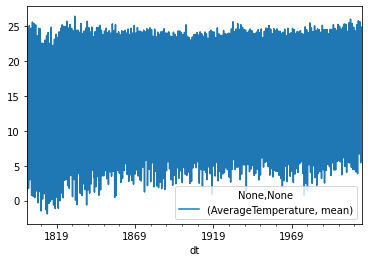

In [96]:
# Trend Visualization
%matplotlib inline
df_avg_1800.plot()

<AxesSubplot:>

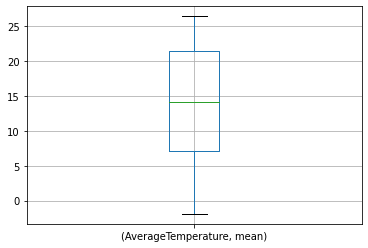

In [87]:
# Checking for outliers
df_avg_1800.boxplot() 

In [88]:
df_avg_1800.describe()

,AverageTemperature
,mean
count,2565.000000
mean,14.027303
std,7.446954
min,-1.920558
25%,7.062111
50%,14.086848
75%,21.455790
max,26.464380


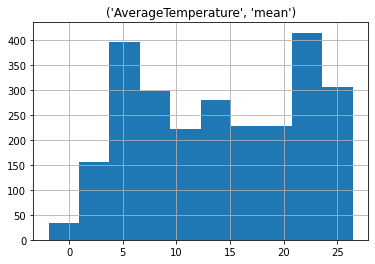

In [89]:
# Checking for distribution
df_avg_1800.hist(column='AverageTemperature')
plt.show()

In [92]:
# Year with the highest temperature
max_temp_year = df_avg_1800.loc[df_avg_1800['AverageTemperature'].idxmax()]

print("Highest temperature:", max_temp_year)

Highest temperature:            AverageTemperature
                         mean
dt                           
1830-07-01           26.46438


In [93]:
# Year with the lowest temperature
min_temp_year = df_avg_1800.loc[df_avg_1800['AverageTemperature'].idxmin()]

print("Lowest temperature:", min_temp_year)

Lowest temperature:            AverageTemperature
                         mean
dt                           
1813-01-01          -1.920558


### Predictive Model : Time series forecasting with ARIMA


In [99]:
# Importing Liabriries for ARIMA model

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
import itertools 

In [106]:
# Paramaetr Selection 

import itertools
import statsmodels.api as sm

p = range(0, 2)
d = range(0, 2)
q = range(0, 2)

pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_pdq = None
best_model = None

for param in pdq:
    try:
        model = sm.tsa.arima.ARIMA(df_avg_1800, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

print("Parameter Selection:", best_pdq)

C:\Users\muluf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\muluf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\muluf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\muluf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\muluf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

Parameter Selection: (1, 1, 1)


In [109]:
# Model

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_avg_1800["AverageTemperature"], order=(1, 1, 1))
model_fit = model.fit()


C:\Users\muluf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\muluf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\muluf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [110]:

#Making forcast using data 
forecast = model_fit.get_forecast()

In [111]:
# Model Evaluation
# Splitting the data to train and test
train_size = int(len(df_avg_1800) * 0.8)
train, test = df_avg_1800[0:train_size], df_avg_1800[train_size:len(df_avg_1800)]

In [113]:
# Fitting Model on the Train dataset

model_train = ARIMA(train['AverageTemperature'], order=(1, 1, 1))
model_train_fit = model_train.fit()


C:\Users\muluf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\muluf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\muluf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [114]:
# Testing Model
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

In [117]:
# Model Evaluation using MSE

# Importing library
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['AverageTemperature'], test_forecast_series)
print(mse)


346.58635755843926


In [118]:
# Checking the Mean Squared Error 
RMSE= mse**0.5
print(RMSE)

18.61682995459859


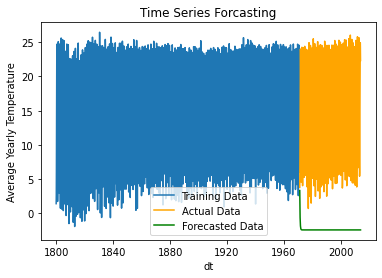

In [121]:
# Creating Plot Train vs Test


plt.plot(train['AverageTemperature'], label='Training Data')
plt.plot(test['AverageTemperature'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')

plt.title('Time Series Forcasting')
plt.xlabel('dt')
plt.ylabel('Average Yearly Temperature')
plt.legend()
plt.show()